# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import json
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kubip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
load_dotenv()
news_api_key = os.getenv("NEWSAPI_KEY")
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [6]:
btc = pd.read_json ('btc.json')
btc_df = pd.json_normalize(btc['articles'])
btc_df = btc_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
sentiment_title = btc_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
btc_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
btc_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
btc_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
btc_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
btc_df.head()

,description,Comp,Pos,Neu,Neg
0,A crypto hoax claimed Kroger is accepting Bitc...,-0.4310,0.046,0.811,0.143
1,There’s a big new presence slurping up power f...,0.5574,0.128,0.872,0.000
2,"For all the talk of democratizing finance, the...",0.0000,0.000,1.000,0.000
3,"Bitcoin, Ethereum, Bitcoin Cash and Litecoin a...",0.2732,0.231,0.769,0.000
4,Bitcoin fell slightly in Asian hours on Thursd...,0.5423,0.123,0.877,0.000


In [7]:
eth = pd.read_json ('eth.json')
eth_df = pd.json_normalize(eth['articles'])
eth_df = eth_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = eth_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
eth_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
eth_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
eth_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
eth_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
eth_df.head()

,description,Comp,Pos,Neu,Neg
0,The NFT Bay is an incredible piece of performa...,0.5423,0.108,0.892,0.000
1,"Bitcoin, Ethereum, Bitcoin Cash and Litecoin a...",0.2732,0.231,0.769,0.000
2,Ethereum is the more resilient cryptocurrency ...,0.0000,0.000,1.000,0.000
3,The surge in October pushed the ethereum-based...,0.0000,0.000,1.000,0.000
4,"The price of Decentraland, whose ticker is man...",-0.1027,0.000,0.947,0.053


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.000000,100.00000
mean,0.122006,0.068110,0.899430,0.03246
std,0.354563,0.078907,0.096548,0.05779
min,-0.790600,0.000000,0.649000,0.00000
25%,0.000000,0.000000,0.825000,0.00000
50%,0.000000,0.053500,0.902000,0.00000
75%,0.400500,0.125000,1.000000,0.05375
max,0.854200,0.324000,1.000000,0.26700


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.000000,100.000000
mean,0.151202,0.080110,0.890840,0.029040
std,0.378461,0.089674,0.099934,0.059675
min,-0.831600,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.824250,0.000000
50%,0.077150,0.066000,0.896500,0.000000
75%,0.445000,0.129000,1.000000,0.000000
max,0.854200,0.353000,1.000000,0.261000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at .08

Q: Which coin had the highest compound score?

A: Both coins had the same highest compound score at .8542

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score at .353

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kubip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kubip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kubip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words("english"))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for bitcoin
btc_tokens = []
for i in btc_df['description']:
    tokenized_text = tokenizer(i)
    btc_tokens.append({'tokens':tokenized_text})

btc_tokens_df = pd.DataFrame(btc_tokens)
btc_df['tokens'] = btc_tokens_df
btc_df.head()

,description,Comp,Pos,Neu,Neg,tokens
0,A crypto hoax claimed Kroger is accepting Bitc...,-0.4310,0.046,0.811,0.143,"[crypto, hoax, claimed, kroger, accepting, bit..."
1,There’s a big new presence slurping up power f...,0.5574,0.128,0.872,0.000,"[theres, big, new, presence, slurping, power, ..."
2,"For all the talk of democratizing finance, the...",0.0000,0.000,1.000,0.000,"[talk, democratizing, finance, vast, majority,..."
3,"Bitcoin, Ethereum, Bitcoin Cash and Litecoin a...",0.2732,0.231,0.769,0.000,"[bitcoin, ethereum, bitcoin, cash, litecoin, a..."
4,Bitcoin fell slightly in Asian hours on Thursd...,0.5423,0.123,0.877,0.000,"[bitcoin, fell, slightly, asian, hour, thursda..."


In [14]:
# Create a new tokens column for Ethereum
# Create a new tokens column for bitcoin
eth_tokens = []
for i in eth_df['description']:
    tokenized_text = tokenizer(i)
    eth_tokens.append({'tokens':tokenized_text})

eth_tokens_df = pd.DataFrame(btc_tokens)
eth_df['tokens'] = btc_tokens_df
eth_df.head()

,description,Comp,Pos,Neu,Neg,tokens
0,The NFT Bay is an incredible piece of performa...,0.5423,0.108,0.892,0.000,"[crypto, hoax, claimed, kroger, accepting, bit..."
1,"Bitcoin, Ethereum, Bitcoin Cash and Litecoin a...",0.2732,0.231,0.769,0.000,"[theres, big, new, presence, slurping, power, ..."
2,Ethereum is the more resilient cryptocurrency ...,0.0000,0.000,1.000,0.000,"[talk, democratizing, finance, vast, majority,..."
3,The surge in October pushed the ethereum-based...,0.0000,0.000,1.000,0.000,"[bitcoin, ethereum, bitcoin, cash, litecoin, a..."
4,"The price of Decentraland, whose ticker is man...",-0.1027,0.000,0.947,0.053,"[bitcoin, fell, slightly, asian, hour, thursda..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = " ".join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(15))
    return pd.DataFrame(list(top_15.items()), columns=['word','count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
corpus = btc_df["description"]
bigram_counter(corpus)

,word,count
0,"(alltime, high)",8
1,"(bitcoin, fell)",6
2,"(first, us)",5
3,"(us, bitcoin)",5
4,"(bitcoin, future)",5
5,"(bitcoin, ether)",5
6,"(exchangetraded, fund)",4
7,"(fund, etf)",4
8,"(eric, adams)",4
9,"(cryptocurrency, market)",4


In [18]:
# Generate the Ethereum N-grams where N=2
corpus = eth_df["description"]
bigram_counter(corpus)

,word,count
0,"(ethereum, blockchain)",6
1,"(every, nft)",5
2,"(alltime, high)",5
3,"(raised, million)",5
4,"(nft, ethereum)",5
5,"(ha, raised)",4
6,"(build, citydao)",4
7,"(bitcoin, ethereum)",3
8,"(said, tuesday)",3
9,"(market, cap)",3


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = []
for text in btc_df['tokens']:
    for word in text:
        btc_words += [word]
        
token_count(btc_words)

[('bitcoin', 90),
 ('cryptocurrency', 28),
 ('said', 20),
 ('us', 17),
 ('crypto', 16),
 ('etf', 15),
 ('first', 14),
 ('market', 14),
 ('high', 13),
 ('record', 13)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_words = []
for text in eth_df['tokens']:
    for word in text:
        eth_words += [word]
        
token_count(eth_words)

[('bitcoin', 90),
 ('cryptocurrency', 28),
 ('said', 20),
 ('us', 17),
 ('crypto', 16),
 ('etf', 15),
 ('first', 14),
 ('market', 14),
 ('high', 13),
 ('record', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
# Separate words by spaces
btc_words = " ".join(btc_words)
eth_words = " ".join(eth_words)

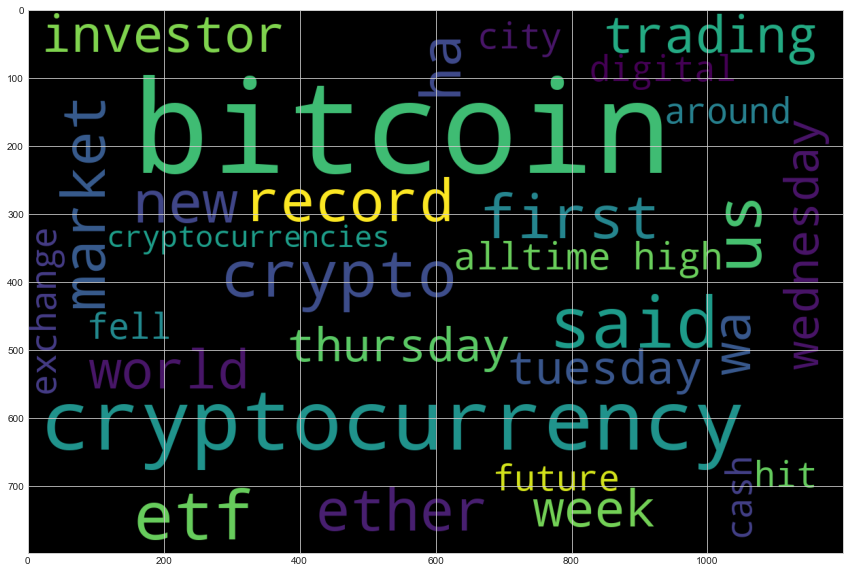

In [24]:
# Generate the Bitcoin word cloud
btc_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(btc_words)
plt.imshow(btc_word_cloud)

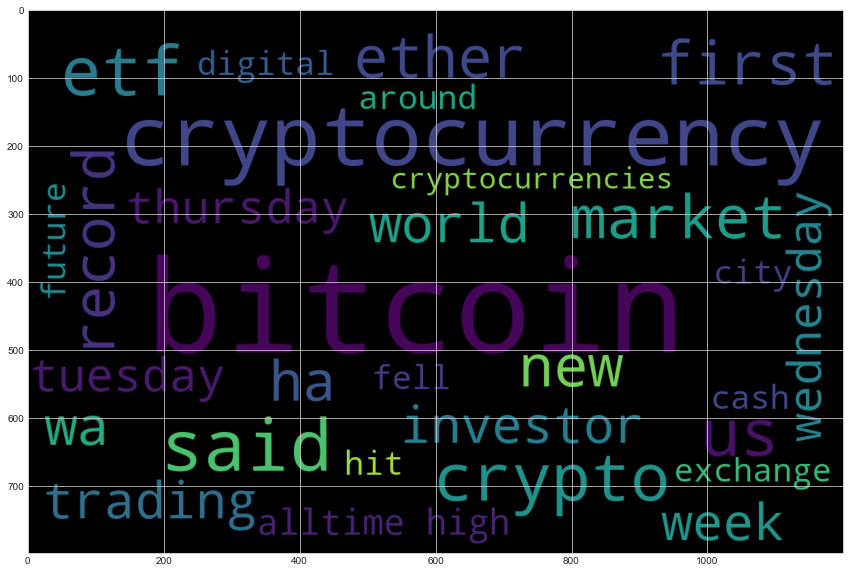

In [25]:
# Generate the Ethereum word cloud
eth_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(eth_words)
plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
articles = btc_df["description"].str.cat()
articles

'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.There’s a big new presence slurping up power from the U.S. grid, and it’s growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining and energy use is skyrocketing as a result.Read more...For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.Read more...Bitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.Bitcoin fell slightly in Asian hours on Thursday, a day after marking an all-time high on optimism around the launch of the first U.S. bitcoin futures ETF.Bitcoin is on the cusp of an all-time high, its latest rally fuelled by the launch of the first U.S. bitcoin futures exchange-traded fund that investors thi

In [38]:
# Run the NER processor on all of the text
resultDoc = nlp(articles)

# Add a title to the document
resultDoc.user_data['title'] = 'Bitcoin NER'

In [39]:
# Render the visualization
displacy.render(resultDoc, style='ent')

In [40]:
# List all Entities
for entity in resultDoc.ents:
    print (entity, entity.label_)

Kroger ORG
Bitcoin Cash PERSON
Walmart PERSON
earlier this year DATE
30.There MONEY
U.S. GPE
U.S. GPE
China GPE
Bitcoin GPE
Bitcoin GPE
Ethereum GPE
Bitcoin Cash PERSON
Litecoin PERSON
Bitcoin GPE
Asian NORP
Thursday DATE
a day DATE
first ORDINAL
U.S. GPE
first ORDINAL
U.S. GPE
Bitcoin GPE
Wednesday DATE
the day DATE
first ORDINAL
U.S. GPE
ETF ORG
Bitcoin GPE
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
bitcoin ETF GPE
SEC ORG
Bitcoin ETF GPE
2022 DATE
SEC ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
Heat ORG
first ORDINAL
Baseball League ORG
Perth Heat ORG
bitcoin GPE
below $60,000 MONEY
first ORDINAL
Nov. 1 DATE
Tuesday DATE
Tuesday DATE
China GPE
National Development and Reform Commission ORG
Meng Wei PERSON
A decade ago DATE
Bitcoin GPE
a few years old DATE
200 CARDINAL
Coinstar PRODUCT
Bitcoin GPE
New York City GPE
Eric Adams PERSON
Perth Heat ORG
Australian Baseball League ORG
Wednesday DATE
bitcoin GPE
first ORDINAL
VanEck PERSON
ETF ORG
Tuesday

---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
articles = eth_df["description"].str.cat()
articles

'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.Bitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.Ethereum is the more resilient cryptocurrency because it has more use cases, JPMorgan\'s analysts said.The surge in October pushed the ethereum-based coin\'s market capitalization from $26 million to $1.19 billion.The price of Decentraland, whose ticker is mana, peaked at $4.16 on Saturday. The ethereum-based token can be used to pay for virtual plots of land.Cook didn\'t specify which coin he owns, like bitcoin or ethereum, but he said Tuesday that the space is something he\'s been interested in for a while.With crypto rewards cards, a small percentage of your purchases can be redeemed for cryptocurrency instead of cash back or points that are redeemable in a rewards portal—that means 1-2% of all purch

In [42]:
# Run the NER processor on all of the text
resultDoc = nlp(articles)

# Add a title to the document
resultDoc.user_data['title'] = 'Ethereum NER'

In [43]:
# Render the visualization
displacy.render(resultDoc, style='ent')

In [44]:
# List all Entities
for entity in resultDoc.ents:
    print (entity, entity.label_)

The NFT Bay LOC
20 CARDINAL
TB ORG
Bitcoin GPE
Ethereum GPE
Bitcoin Cash PERSON
Litecoin PERSON
JPMorgan ORG
October DATE
coin ORG
$26 million to $1.19 billion MONEY
Decentraland LOC
4.16 MONEY
Saturday DATE
Cook PERSON
Tuesday DATE
1-2% PERCENT
CME ORG
Trey Griggs PERSON
US GPE
GSR.It PERSON
India GPE
ol><li PERSON
Bitcoin GPE
almost 20% PERCENT
Crypto GPE
just 5% PERCENT
Bitcoin GPE
Ethereum GPE
Litecoin GPE
Ripple PERSON
November 19th 2021 DATE
two million CARDINAL
Dogecoin GPE
200 CARDINAL
20 CARDINAL
Bitcoin GPE
people" NORP
Rahul Rai PERSON
24-year-old DATE
the next six or so months DATE
Hours ago DATE
nearly 20 CARDINAL
TB ORG
NFT ORG
as much as 3.5% PERCENT
4,403.93 MONEY
Ethereum ORG
second ORDINAL
US$500 billion MONEY
£363 billion MONEY
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Swiss NORP
Winding Tree PERSON
Tuesday DATE
U.S. GPE
CryptoPunk ORG
9998 DATE
more than half CARDINAL
Asia LOC
Tuesday DATE
Bitcoin GPE
Asia LOC
Tuesday DATE
The B

---